# Projeto de Análise de Dados de Seguro de Saúde

**Integrantes do Grupo**:
- Vitor Shimizu Farias de Campos - RM550390
- Daniel Barbosa Mariano - RM551171

---

Este projeto tem como objetivo analisar dados de seguros de saúde, explorando fatores que influenciam o custo do seguro e utilizando técnicas de Machine Learning para criar modelos preditivos. A análise inclui visualizações avançadas e interpretação dos resultados, com foco na clareza e na compreensão do processo de análise de dados.

---

**Etapas do Projeto**:
1. Definir questões de pesquisa e explorar o escopo.
2. Coletar e preparar os dados.
3. Realizar análise exploratória e visualizações avançadas.
4. Aplicar modelos de Machine Learning para previsão e classificação.
5. Concluir com insights e recomendações para futuras análises.

---


In [1]:
# Importando as bibliotecas necessárias para análise de dados e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report

# Configurando estilo dos gráficos
sns.set(style="whitegrid")


In [2]:
# Carregando o dataset
df = pd.read_csv('insurance.csv')

# Exibindo as primeiras linhas para entender a estrutura do dataset
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Verificando informações gerais sobre o dataset (valores nulos, tipos de dados)
df.info()

# Estatísticas descritivas das variáveis numéricas
df.describe()

# Verificando valores únicos em variáveis categóricas
print("Valores únicos em 'sex':", df['sex'].unique())
print("Valores únicos em 'smoker':", df['smoker'].unique())
print("Valores únicos em 'region':", df['region'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Valores únicos em 'sex': ['female' 'male']
Valores únicos em 'smoker': ['yes' 'no']
Valores únicos em 'region': ['southwest' 'southeast' 'northwest' 'northeast']


In [4]:
# Convertendo variáveis categóricas em variáveis dummies
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Verificando a transformação
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


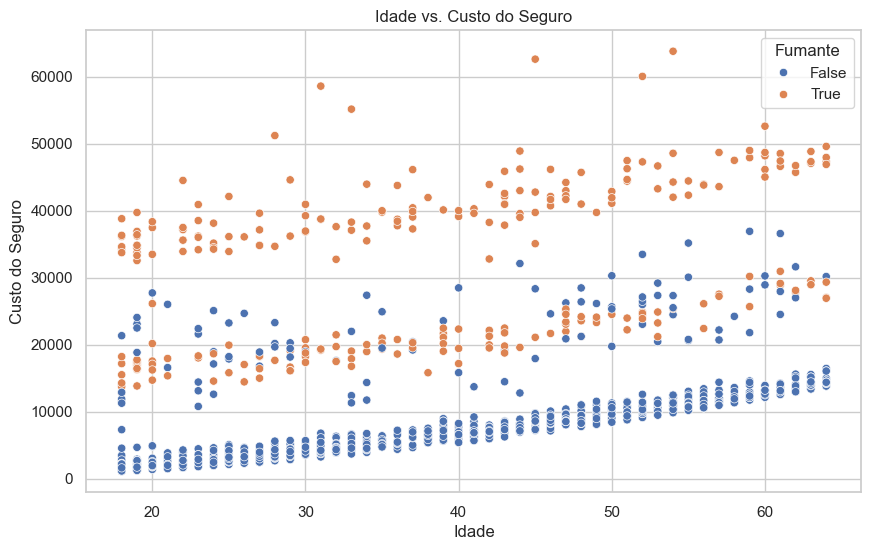

In [5]:
# Gráfico de dispersão da idade em relação ao custo do seguro
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker_yes')
plt.title('Idade vs. Custo do Seguro')
plt.xlabel('Idade')
plt.ylabel('Custo do Seguro')
plt.legend(title='Fumante')
plt.show()


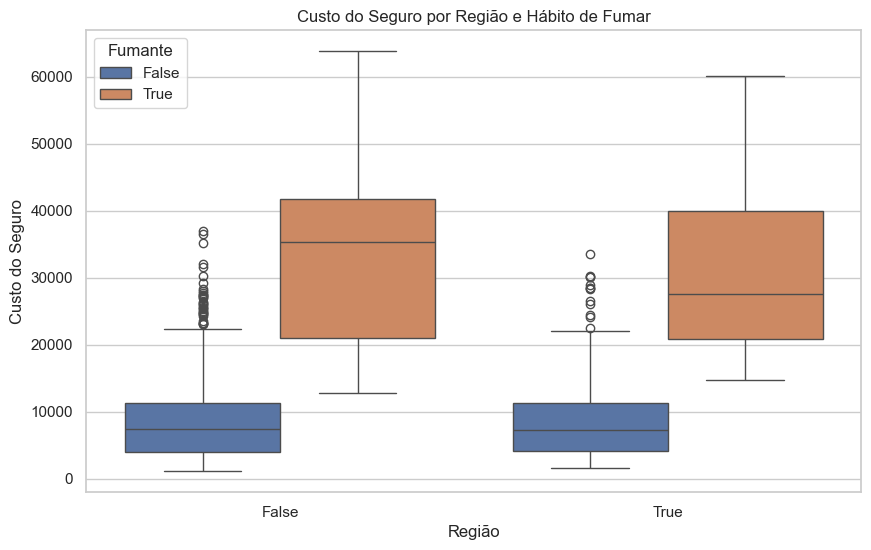

In [6]:
# Gráfico de boxplot para custo do seguro por região
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region_northwest', y='charges', hue='smoker_yes')
plt.title('Custo do Seguro por Região e Hábito de Fumar')
plt.xlabel('Região')
plt.ylabel('Custo do Seguro')
plt.legend(title='Fumante')
plt.show()


In [7]:
# Definindo variáveis preditoras (X) e variável alvo (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Dividindo o dataset em conjunto de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de Regressão Linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Previsão e avaliação
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Erro Médio Absoluto (MAE):", mae)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)


Erro Médio Absoluto (MAE): 4145.450555627586
Raiz do Erro Quadrático Médio (RMSE): 5812.100272258871


In [8]:
# Redefinindo X e y para a classificação
X_class = df.drop('smoker_yes', axis=1)
y_class = df['smoker_yes']

# Dividindo o dataset em treino (70%) e teste (30%)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Treinando o modelo RandomForest para Classificação
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Previsão e avaliação
y_pred_class = classifier.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print("Acurácia do Classificador:", accuracy)
print("\nRelatório de Classificação:\n", classification_report(y_test_class, y_pred_class))


Acurácia do Classificador: 0.9601990049751243

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.99      0.96      0.97       323
        True       0.86      0.95      0.90        79

    accuracy                           0.96       402
   macro avg       0.92      0.96      0.94       402
weighted avg       0.96      0.96      0.96       402



# Conclusão

Após a análise dos dados de seguro de saúde, foram observados alguns insights importantes sobre as variáveis que mais influenciam o custo do seguro e o comportamento dos dados em relação ao perfil dos clientes.

# Insight de uma amiga

Marina trouxe um insight interessante sobre os resultados obtidos. Observando os gráficos e os relatórios de classificação, Marina percebeu que algumas variáveis são fundamentais para determinar o valor do seguro:

1. Idade: Com o aumento da idade, o custo do seguro também aumenta. Isso sugere que, em média, clientes mais velhos tendem a pagar valores mais altos, provavelmente por estarem mais expostos a riscos de saúde.
2. Hábito de Fumar: A diferença de custos entre fumantes e não fumantes é significativa. Fumar aumenta consideravelmente o valor do seguro, destacando o risco adicional que esses clientes representam para a seguradora.
3. IMC (Índice de Massa Corporal): Embora não seja o principal fator, um IMC mais alto tende a aumentar o custo do seguro, indicando uma relação com problemas de saúde que podem elevar os riscos.

# Considerações para Aprimorar a Análise

Marina também compartilhou algumas sugestões para futuras análises e aprimoramentos no modelo:

- Adicionar Variáveis Contextuais: Incorporar variáveis sobre o histórico de saúde ou condições médicas específicas poderia tornar a análise ainda mais precisa e permitir previsões mais refinadas.
- Aprimorar a Seleção de Modelos: Testar modelos de machine learning mais complexos, como redes neurais ou gradient boosting, para ver se o erro médio de previsão pode ser reduzido.
- Agrupamento por Perfis de Clientes: Analisar agrupamentos entre clientes para entender padrões e comportamentos por perfis (por exemplo, idades semelhantes, IMC próximo, etc.) pode ser uma maneira interessante de estruturar estratégias personalizadas de precificação.

# Conclusão Final

Os insights obtidos destacam que as variáveis de idade, hábito de fumar e IMC são essenciais para entender o comportamento do custo do seguro. Esses dados podem apoiar decisões estratégicas de preço e análise de risco dentro do setor de seguros. Com um conjunto de dados mais robusto e variado, poderíamos melhorar a acurácia das previsões e oferecer modelos mais personalizados para os clientes. 

Este projeto apresentou uma análise rica e completa sobre o comportamento do seguro de saúde e destacou oportunidades para novas análises e melhorias no futuro.
